# Imports

In [202]:
#import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import numpy as np
#implemnt CBoW and skipgram
from gensim.models import Word2Vec
import pandas as pd
from gensim.models import Word2Vec
import ast
import ast
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import plotly.express as px
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Relevant Dataset 3  Marks
*This dataset is used to develop a patient-doctor chatbot system. It consists of patient queries and corresponding doctor responses, sourced from Kaggle. The goal of the project is to allow the patient to ask a question, which is then processed using embeddings to identify the most relevant question in the dataset. The index of the most similar question is used to retrieve the corresponding doctor’s response, providing the patient with an answer closely aligned to their query.*

In [111]:
# Load dataset
df=pd.read_csv('/content/HealthCareMagic-100k_processed_input_column.csv')
df.head()


,input,output,Processed_input
0,I woke up this morning feeling the whole room ...,"Hi, Thank you for posting your query. The most...","['woke', 'morn', 'feel', 'whole', 'room', 'spi..."
1,My baby has been pooing 5-6 times a day for a ...,Hi... Thank you for consulting in Chat Doctor....,"['babi', 'poo', '56', 'time', 'day', 'week', '..."
2,"Hello, My husband is taking Oxycodone due to a...","Hello, and I hope I can help you today.First, ...","['hello', 'husband', 'take', 'oxycodon', 'due'..."
3,lump under left nipple and stomach pain (male)...,HI. You have two different problems. The lump ...,"['lump', 'left', 'nippl', 'stomach', 'pain', '..."
4,I have a 5 month old baby who is very congeste...,Thank you for using Chat Doctor. I would sugge...,"['5', 'month', 'old', 'babi', 'congest', 'terr..."


# Task 1: Data Preprocessing and Exploration

## 1. Tokenization (2 Marks)

## 2. Stemming (2 Marks)

## 3. Stop Words Removal (1 Mark)

## 4. Lowercasing (1 Mark)

## 5. Special Characters Removal (1 Mark)

## 6. Remove URLs (1 Mark)


In [112]:
df['output'][0]

'Hi, Thank you for posting your query. The most likely cause for your symptoms is benign paroxysmal positional vertigo (BPPV), a type of peripheral vertigo. In this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. Accompanying nausea and vomiting are common. The condition is due to problem in the ear, and improves in a few days on own. Betahistine tablets would help relieve your symptoms. Doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. An ENT evaluation would also help. I hope it helps. Best wishes, Chat Doctor. '

In [117]:
# Tokenization, lowercasing, stopword removal, and lemmatization
stemmer = PorterStemmer()
def tokenize_text(text):
    tokens=text.split(" ")
    return tokens
def preprocess_text(text):
    lower_text = str(text).lower()
    urls_removed_text = re.sub(r'http\S+|www\S+|https\S+', '', lower_text)
    special_characters_removed_text = re.sub(r'[^\w\s]', '', urls_removed_text)
    tokens = tokenize_text(special_characters_removed_text)
    stopwords_set = set(stopwords.words('english'))
    stop_words_removed=[]
    for singleWord in tokens:
        if singleWord not in stopwords_set:
            stop_words_removed.append(singleWord)
    stemmed_words=[]
    for singleWord in stop_words_removed:
        stemmed_words.append(stemmer.stem(singleWord))
    return stemmed_words

# Task 1: Visulization functions

In [165]:
# Visualize unigrams, bigrams, and trigrams
def create_n_grams(df, n):
    n_grams = {}
    for i in range(len(df)):
        words = (df['Processed_input'][i])
        for j in range(len(words)-n+1):
            n_gram = tuple(words[j:j+n])
            if n_gram in n_grams:
                n_grams[n_gram] += 1
            else:
                n_grams[n_gram] = 1
    n_grams_df = pd.DataFrame(list(n_grams.items()), columns=[n+'_gram', 'count'])
    n_grams_df.to_csv(n+'_n_grams.csv', index=False)

def plot_frequent_ngrams(unigram_file, bigram_file, trigram_file):
    unigram_df = pd.read_csv(unigram_file)

    bigram_df = pd.read_csv(bigram_file)

    trigram_df = pd.read_csv(trigram_file)
    unigram_df = unigram_df.sort_values(by='count', ascending=False)
    bigram_df = bigram_df.sort_values(by='count', ascending=False)
    trigram_df = trigram_df.sort_values(by='count', ascending=False)
    plt.figure(figsize=(6,6))

    sns.barplot(x='count', y='1_gram', data=unigram_df.head(10), palette='viridis')
    plt.title('Top 10 Unigrams')
    plt.xlabel('Count')
    plt.ylabel('Unigrams')
    plt.show()

    plt.figure(figsize=(6,6))
    sns.barplot(x='count', y='2_gram', data=bigram_df.head(10), palette='viridis')
    plt.title('Top 10 Bigrams')
    plt.xlabel('Count')
    plt.ylabel('Bigrams')
    plt.show()

    plt.figure(figsize=(6,6))
    sns.barplot(x='count', y='3_gram', data=trigram_df.head(10), palette='viridis')
    plt.title('Top 10 Trigrams')
    plt.xlabel('Count')
    plt.ylabel('Trigrams')
    plt.show()

def word_cloud(filename,col):
    n_grams_df = pd.read_csv(filename)
    n_grams_df[col] = n_grams_df[col].apply(lambda x: x.strip("()").replace(",", ""))
    n_grams_df = n_grams_df.sort_values(by='count', ascending=False)
    n_grams_df = n_grams_df.head(100)
    n_grams_dict = dict(zip(n_grams_df[col], n_grams_df['count']))
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=None,
                          min_font_size=10).generate_from_frequencies(n_grams_dict)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.title(col+' Word Cloud')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


# Task 1 : Main

In [121]:
df=pd.read_csv("/content/HealthCareMagic-100k.csv")
df['Processed_input']=df['input'].apply(preprocess_text)
df.to_csv('HealthCareMagic-100k_processed.csv', index=False)
print("Processing Done")

Processing Done


# Word Distribution (2 Marks)

In [ ]:
df=pd.read_csv("/content/HealthCareMagic-100k_processed_input_column.csv")
create_n_grams(df,1)
create_n_grams(df,2)
create_n_grams(df,3)

<ipython-input-142-ca2ce1ec0e2f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='1_gram', data=unigram_df.head(10), palette='viridis')


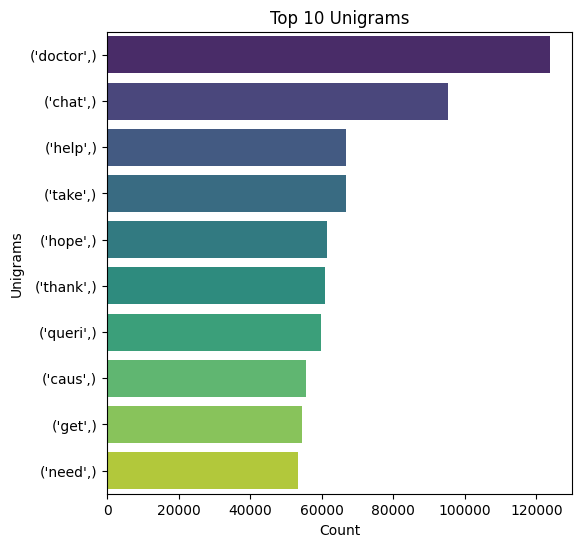

<ipython-input-142-ca2ce1ec0e2f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='2_gram', data=bigram_df.head(10), palette='viridis')


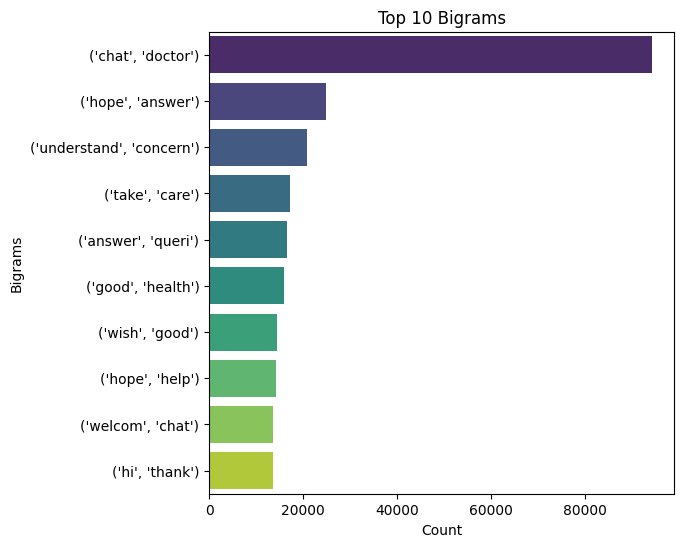

<ipython-input-142-ca2ce1ec0e2f>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='3_gram', data=trigram_df.head(10), palette='viridis')


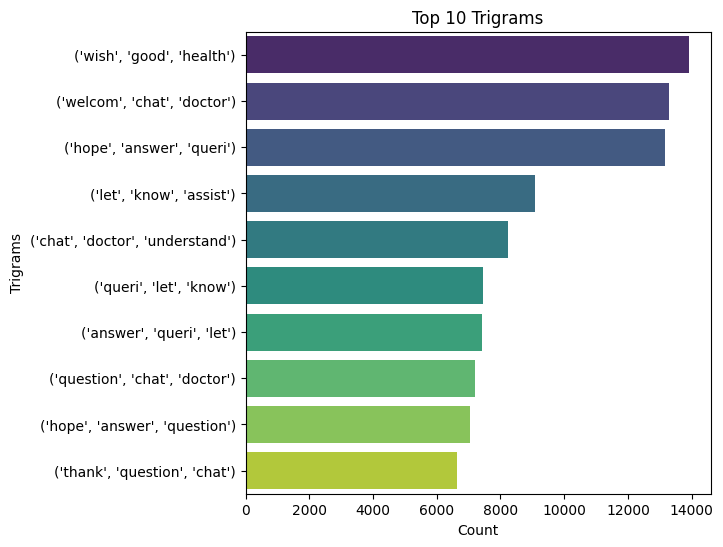

In [161]:
plot_frequent_ngrams('1_n_grams.csv', '2_n_grams.csv', '/content/drive/MyDrive/3_n_grams.csv')

# Visulization (2 Marks)

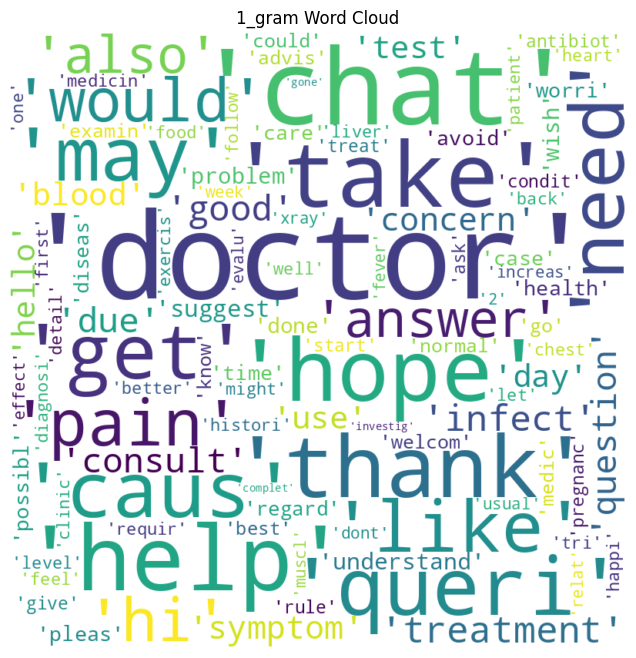

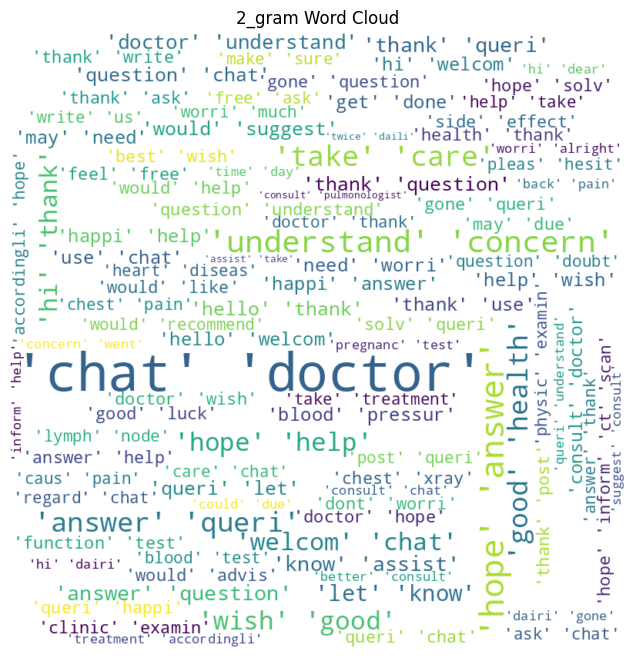

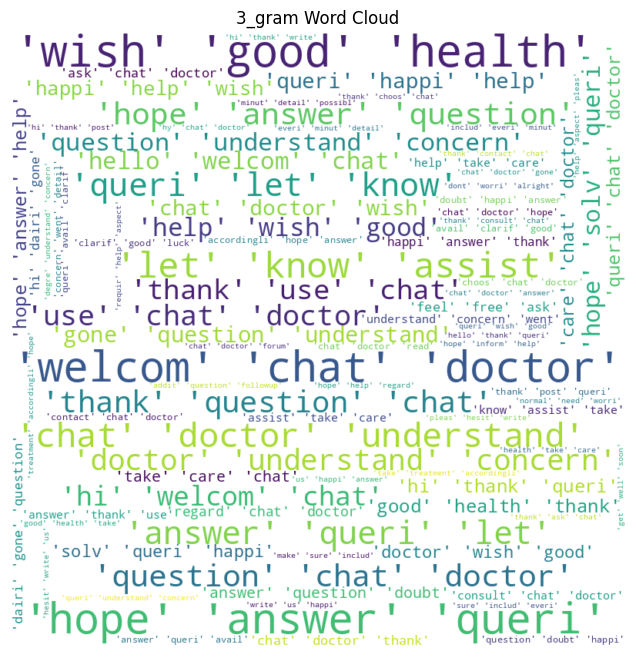

In [166]:
word_cloud('1_n_grams.csv','1_gram')
word_cloud('2_n_grams.csv','2_gram')
word_cloud('/content/drive/MyDrive/3_n_grams.csv','3_gram')

## **Task 2: TF-IDF Based Similarity**

In [167]:
df=pd.read_csv('/content/HealthCareMagic-100k_processed_input_column.csv')
df.head()

,input,output,Processed_input
0,I woke up this morning feeling the whole room ...,"Hi, Thank you for posting your query. The most...","['woke', 'morn', 'feel', 'whole', 'room', 'spi..."
1,My baby has been pooing 5-6 times a day for a ...,Hi... Thank you for consulting in Chat Doctor....,"['babi', 'poo', '56', 'time', 'day', 'week', '..."
2,"Hello, My husband is taking Oxycodone due to a...","Hello, and I hope I can help you today.First, ...","['hello', 'husband', 'take', 'oxycodon', 'due'..."
3,lump under left nipple and stomach pain (male)...,HI. You have two different problems. The lump ...,"['lump', 'left', 'nippl', 'stomach', 'pain', '..."
4,I have a 5 month old baby who is very congeste...,Thank you for using Chat Doctor. I would sugge...,"['5', 'month', 'old', 'babi', 'congest', 'terr..."


In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
df=pd.read_csv('HealthCareMagic-100k_processed_input_column.csv')
df.head()

,input,output,Processed_input
0,I woke up this morning feeling the whole room ...,"Hi, Thank you for posting your query. The most...","['woke', 'morn', 'feel', 'whole', 'room', 'spi..."
1,My baby has been pooing 5-6 times a day for a ...,Hi... Thank you for consulting in Chat Doctor....,"['babi', 'poo', '56', 'time', 'day', 'week', '..."
2,"Hello, My husband is taking Oxycodone due to a...","Hello, and I hope I can help you today.First, ...","['hello', 'husband', 'take', 'oxycodon', 'due'..."
3,lump under left nipple and stomach pain (male)...,HI. You have two different problems. The lump ...,"['lump', 'left', 'nippl', 'stomach', 'pain', '..."
4,I have a 5 month old baby who is very congeste...,Thank you for using Chat Doctor. I would sugge...,"['5', 'month', 'old', 'babi', 'congest', 'terr..."


# Task 2 TFIDF Matrix (3 Marks)

In [170]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Processed_input']) #replace the data with your processed data

In [171]:
print(tfidf_matrix)

  (0, 167611)	0.10340793416222395
  (0, 103508)	0.08070051269729807
  (0, 65852)	0.21453451433493126
  (0, 166881)	0.21478265053381906
  (0, 133146)	0.11708299794263355
  (0, 143330)	0.6170678706657219
  (0, 140069)	0.1889189242575751
  (0, 166277)	0.07073812123470137
  (0, 31187)	0.12503177469598978
  (0, 164580)	0.08717833422345006
  (0, 160716)	0.23451950053819484
  (0, 157697)	0.14654008281063285
  (0, 68333)	0.1458669307448072
  (0, 106390)	0.1364579984107641
  (0, 164148)	0.1012058864259334
  (0, 167727)	0.12420366715869129
  (0, 44544)	0.0740252857242803
  (0, 150057)	0.05502813173874162
  (0, 116304)	0.17184844157167206
  (0, 140584)	0.08494249583041336
  (0, 80112)	0.08259220888440183
  (0, 145220)	0.06604332174850588
  (0, 165207)	0.08984265506718862
  (0, 91556)	0.10993355271540882
  (0, 76021)	0.08272450629876099
  :	:
  (112164, 117288)	0.09445324338011729
  (112164, 67319)	0.14514432651564318
  (112164, 47778)	0.1585161166786292
  (112164, 160982)	0.10905943255195369
  (1

# Task 2 Recommendation using cosine similarity (3 Marks)

In [194]:
def recommend_tfidf(query):
    query_tfidf = vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix)
    cosine_similarities = cosine_similarities.flatten()
    most_similar_idx = cosine_similarities.argsort()[-10:][::-1]
    print("Query: ",query)
    print("Answer: ",df.iloc[most_similar_idx[0]]['output'])

In [173]:
df['input'][1]

'My baby has been pooing 5-6 times a day for a week. In the last few days it has increased to 7 and they are very watery with green stringy bits in them. He does not seem unwell i.e no temperature and still eating. He now has a very bad nappy rash from the pooing ...help!'

In [195]:
# Example Query
query='I woke up this morning feeling the whole room is spinning when i was sitting down. I went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. I try to vomit but it wont come out.. After taking panadol and sleep for few hours, i still feel the same.. By the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. And it is normal stomach discomfort at the same time? Earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. Thank you doc!'
query='My baby has been pooing 5-6 times a day for a week. In the last few days it has increased to 7 and they are very watery with green stringy bits in them. He does not seem unwell i.e no temperature and still eating. He now has a very bad nappy rash from the pooing ...help!'
query='hypertension'
print("TF-IDF Recommendations:")
print(recommend_tfidf(query))

TF-IDF Recommendations:
Query:  hypertension
Answer:  Hello, Thank you for posting on Chat Doctor. The condition your husband is having is called Urticaria or hives. It's an allergic manifestation of skin, where an allergen leads to release of certain substances from your blood, leading to itchy skin rash and swelling over soft tissues. Its proper management requires thorough history, clinical and laboratory work-up. You may have to go for specific tests like patch test, food prick test, IGE antibody levels etc. As for treatment part, best would be the avoidance of allergen as far as possible. Try to eliminate possible triggering foods from diet. I would also advise you various antihistamines for long duration(at least 3 months) with or without oral corticosteroids. For non-responding cases there are many other Chat Doctor.  Hope this will help you in resolving your query. Thank you 
None


## **Task 3: Word Embeddings Based Similarity**

# Task 3 Skip Gram (5 Marks)

In [ ]:
df = pd.read_csv("HealthCareMagic-100k_processed_input_column.csv")
df['Processed_input'] = df['Processed_input'].apply(ast.literal_eval)
sentences = df['Processed_input'].tolist()
skipgram_model_trained = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)
skipgram_model_trained.save("skipgram_model_final.bin")
print("Training complete! Model saved.")

# Task 3 CBOW (5 Marks)

In [ ]:
df = pd.read_csv("HealthCareMagic-100k_processed_input_column.csv")
df['Processed_input'] = df['Processed_input'].apply(ast.literal_eval)
sentences = df['Processed_input'].tolist()
cbow_model_trained = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)
cbow_model_trained.save("cbow_model_final.bin")
print("Training complete! Models saved.")

# Task 2 : Word Embeddings  3 marks

In [91]:
from gensim.models import Word2Vec
def convert_to_embeddings(query,model):
    words = preprocess_text(query)
    embedding = np.zeros(model.vector_size)
    valid_word_count = 0
    for word in words:
        if word in model.wv.key_to_index:
            embedding += model.wv[word]
            valid_word_count += 1
    if valid_word_count == 0:
        return embedding
    if valid_word_count > 0:
        embedding /= valid_word_count
    return embedding

In [179]:
def convertion_of_each_sentence_to_embedding():
  df=pd.read_csv("HealthCareMagic-100k_processed_input_column.csv")
  cbow_model=Word2Vec.load("cbow_model_final.bin")
  skipgram_model=Word2Vec.load("skipgram_model_final.bin")
  df['embeddings_skip_gram'] = df['Processed_input'].apply(lambda x: convert_to_embeddings(x,skipgram_model))
  df['embeddings_cbow'] = df['Processed_input'].apply(lambda x: convert_to_embeddings(x,cbow_model))
  df.to_csv('embeddings.csv', index=False)
def convert_string_to_array(embedding_str):
        return np.fromstring(embedding_str[1:-1], sep=' ')

In [80]:
convertion_of_each_sentence_to_embedding()

# Task 3 Cosine Similarity (3 Marks)

In [186]:
from sklearn.metrics.pairwise import cosine_similarity
def find_cosine_similarity(embedded_query,total_embeddings):
    return cosine_similarity(embedded_query,total_embeddings)[0]

# Task 3  Recommendation (3 Marks)

In [182]:
    df=pd.read_csv('embeddings.csv')

In [196]:
def recommend_word2vec(query,df):
    skip_gram_model_trained = Word2Vec.load("skipgram_model_final.bin")
    cbow_model_trained = Word2Vec.load("cbow_model_final.bin")
    query_skip_gram = convert_to_embeddings(query, skip_gram_model)
    query_cbow = convert_to_embeddings(query, cbow_model)
    query_skip_gram = np.array(query_skip_gram).reshape(1, -1)
    query_cbow = np.array(query_cbow).reshape(1, -1)
    cbow_embeddings = np.vstack(df['embeddings_cbow'].apply(convert_string_to_array).values)
    skipgram_embeddings = np.vstack(df['embeddings_skip_gram'].apply(convert_string_to_array).values)
    similarities_cbow = find_cosine_similarity(query_cbow, cbow_embeddings)
    similarities_skipgram = find_cosine_similarity(query_skip_gram, skipgram_embeddings)
    most_similar_cbow_idx = np.argmax(similarities_cbow)
    most_similar_skipgram_idx = np.argmax(similarities_skipgram)
    print("Most similar sentence based on CBOW model:")
    print(f"Index: {most_similar_cbow_idx}, Similarity: {similarities_cbow[most_similar_cbow_idx]}")
    print("Most similar sentence based on Skip-gram model:")
    print(f"Index: {most_similar_skipgram_idx}, Similarity: {similarities_skipgram[most_similar_skipgram_idx]}")
    print(" ")
    print("Query : ",query)
    print(" ")
    print("Response of doctor (from cbow) : ",df['output'][most_similar_cbow_idx])
    print("Response of doctor (from skipgram) : ",df['output'][most_similar_skipgram_idx])
    return most_similar_cbow_idx, most_similar_skipgram_idx

In [192]:
recommend_word2vec("i am feeling pain in stomach",df)

Most similar sentence based on CBOW model:
Index: 14347, Similarity: 0.9380564135187559
Most similar sentence based on Skip-gram model:
Index: 85471, Similarity: 0.9655118110540974
 
Query :  i am feeling pain in stomach
Response of doctor (from cbow) :  Hi, thank you for posting. I have gone through your query and I understand your concerns. According to your symptoms I can say that you suffer from gastritis. Gastritis is the inflammation of the mucous of stomach. To determine the causes you need:1. Fibrogastroendoscopy.2. Liver function test.3. Abdominal ultrasound.4. Complete blood count5. Urine test. To improve your health condition you should follow these guidelines:1. Eliminate spicy and acidic foods from your diet.2. Do not Chat Doctor. 
Response of doctor (from skipgram) :  Dear welcome to Chat Doctor Pain especially on the right side, may be the sign of a more serious illness like appendicitis, pancreatitis, food poisoning, gallstones, ectopic pregnancy, diverticulitis, viral 

(14347, 85471)

# Better Method (3 Marks)

 **sample from each approach**

*Using Tfidf vectorization*

In [200]:
recommend_tfidf("I am feeling pain in stomach and vomitting")

Query:  I am feeling pain in stomach and vomitting
Answer:  Hi... I sympathize with the kid and understand your concern. The trick of the management is keeping the skin moist and never allowing it to be Chat Doctor.  For this oil massage and lotions like Hiatus will help. Regarding cure options - eczema is a sort of allergy...allergies can only be controlled and can never be cured. But usually kids grow out of it...that is as the age progresses, they become better starting from 6 months. Hope my answer was helpful for you. I am happy to help any time. Further clarifications and consultations on Chat Doctor are welcome. If you do not have any clarifications, you can close the discussion and rate the answer. Wish your kid good health. Regards - 


*Using The word2vec approach*

In [199]:
recommend_word2vec("I am feeling pain in stomach and vomiting",df)

Most similar sentence based on CBOW model:
Index: 3613, Similarity: 0.9295823290475943
Most similar sentence based on Skip-gram model:
Index: 3613, Similarity: 0.963530350264517
 
Query :  I am feeling pain in stomach and vomiting
 
Response of doctor (from cbow) :  Hello Good Evening, According to your symptoms you might be suffered from Gastric or duodenal ulcers which cause pain/burning sensation and nausea and even vomiting. After having spicy food your symptoms rise, because there is physiological more release of acid for the digestion of food. For the confirmation of your diagnosis you should go through UGI Endoscopy. After that you should be prescribed PPI, Risperidone, Antacids and Sucralfate as per guidance of your GP. Following steps should follow to lessen your symptoms:-Walk after eating a meal.-Exercise-Avoid coffee and chocolates.-Avoid Meals that are high in fat.-Avoid extremely hot or cold food.-Avoid alcohol and smoking
Response of doctor (from skipgram) :  Hello Good 

(3613, 3613)

*As We See the responses of both approaches we can distinguish between both the quality of the context maintained in each approach clearly showing that from both approaches word2vec is the best .*

# Limitations (2 Marks)

**Tfidf Limitations**

*This method is much faster but it dont maintain any context of the sentence moreover.It also have a problem of sparse vectors means that majority of the words in requested query might not present in vocablary so giving them a probality of zero making performance very poor*

**Word2Vec**

*Out of Vocabulary (OOV) Words are zero in embedding *
*Biased Embeddings depends on training data*
*Computational Complexity*
